В этом блокноте мы научимся выполнять сглаживание и строить тренд временного ряда.

Для начала загрузим [данные](https://studio.openedu.ru/assets/courseware/v1/f9a98baa4e51f14b5448a7fdca8b125e/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/task5_983784.csv) уже привычным нам образом


ИЗ 7

Задан временной ряд  из  элементов (см. файл). Ряд содержит шумы. Проведите экспоненциальное сглаживание временного ряда. При сглаживании используйте коэффициент сглаживания 0.19.

Укажите сглаженное значение для 53-ой (отсчет начинается с 1) точки ряда: ответ округл до 2 зн
Укажите сглаженное значение для 100-ой (последней) точки ряда:
Постройте линейный тренд для этого же исходного временного ряд

Определите, насколько хорошо линейный тренд аппроксимирует значения временного ряда.

Определите коэффициент  линейного тренда, задаваемого уравнением вида :ax+b
Определите коэффициент детерминации R2 для тренда:

Спрогнозируйте 101-е значение ряда (используйте уравнение линейного тренда). Округлить до целых

In [1]:
import pandas as pd
import numpy as np

data_series = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/Zadachi_ITMO_teorver_statistica/task5_187720.csv')

In [2]:
data_series

,y
0,23
1,14
2,23
3,18
4,16
...,...
95,201
96,187
97,202
98,208


В задании нумерация начинается с $1$, а у нас — с $0$. Исправим это, выполнив сдвиг индексов

In [3]:
data_series.index += 1 
data_series

,y
1,23
2,14
3,23
4,18
5,16
...,...
96,201
97,187
98,202
99,208


Напишем функцию самостоятельно:

In [6]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1]) 
    return result

Проведем сглаживание и запишем результат в столбец <code>y_exp_norm_user</code>

In [7]:
data_series['y_exp_norm_user'] = exponential_smoothing(data_series['y'].to_list(), 0.19)

In [8]:
data_series

,y,y_exp_norm_user
1,23,23.000000
2,14,21.290000
3,23,21.614900
4,18,20.928069
5,16,19.991736
...,...,...
96,201,184.729786
97,187,185.161127
98,202,188.360513
99,208,192.092015


Построим графики исходного и сглаженного рядов

In [9]:
import matplotlib.pyplot as plt

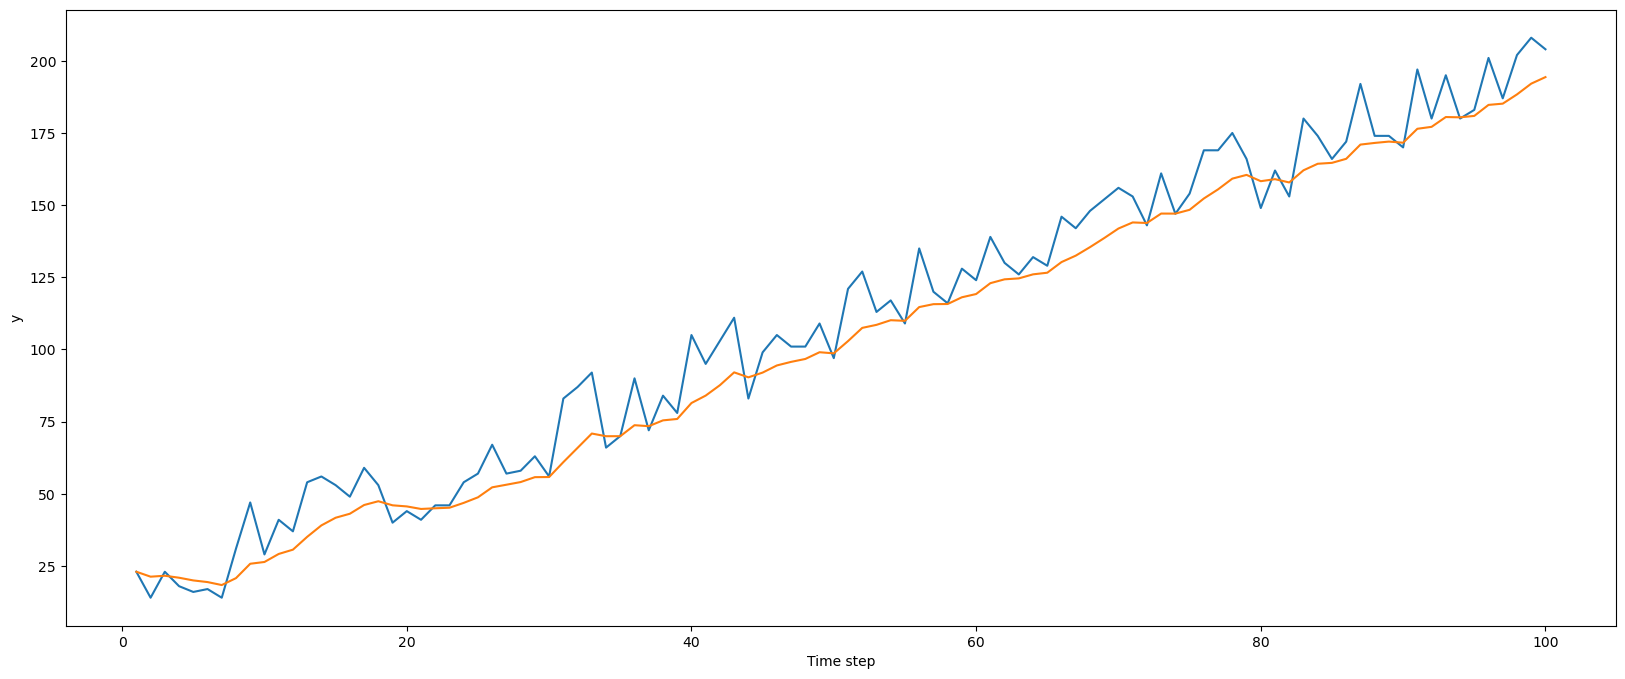

In [10]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Выведем 53-ую строку нашего набора данных

In [11]:
data_series.loc[[53]]

,y,y_exp_norm_user
53,113,108.52946


Выведем только 53-е сглаженное значение

In [12]:
data_series['y_exp_norm_user'].loc[[53]]

53    108.52946
Name: y_exp_norm_user, dtype: float64

Округлим его до сотых

In [14]:
y53 = data_series['y_exp_norm_user'].loc[[53]]
round(y53, 2)

53    108.53
Name: y_exp_norm_user, dtype: float64

Теперь проведем экспоненциальное сглаживание нашего временного ряда, используя функцию <code>ewm</code>. Результат запишем в новый столбец <code>y_exp_norm</code>

In [15]:
data_series['y_exp_norm'] = data_series['y'].ewm(alpha = 0.19, adjust = False).mean()

In [16]:
data_series

,y,y_exp_norm_user,y_exp_norm
1,23,23.000000,23.000000
2,14,21.290000,21.290000
3,23,21.614900,21.614900
4,18,20.928069,20.928069
5,16,19.991736,19.991736
...,...,...,...
96,201,184.729786,184.729786
97,187,185.161127,185.161127
98,202,188.360513,188.360513
99,208,192.092015,192.092015


Построим графики исходного и сглаженного рядов

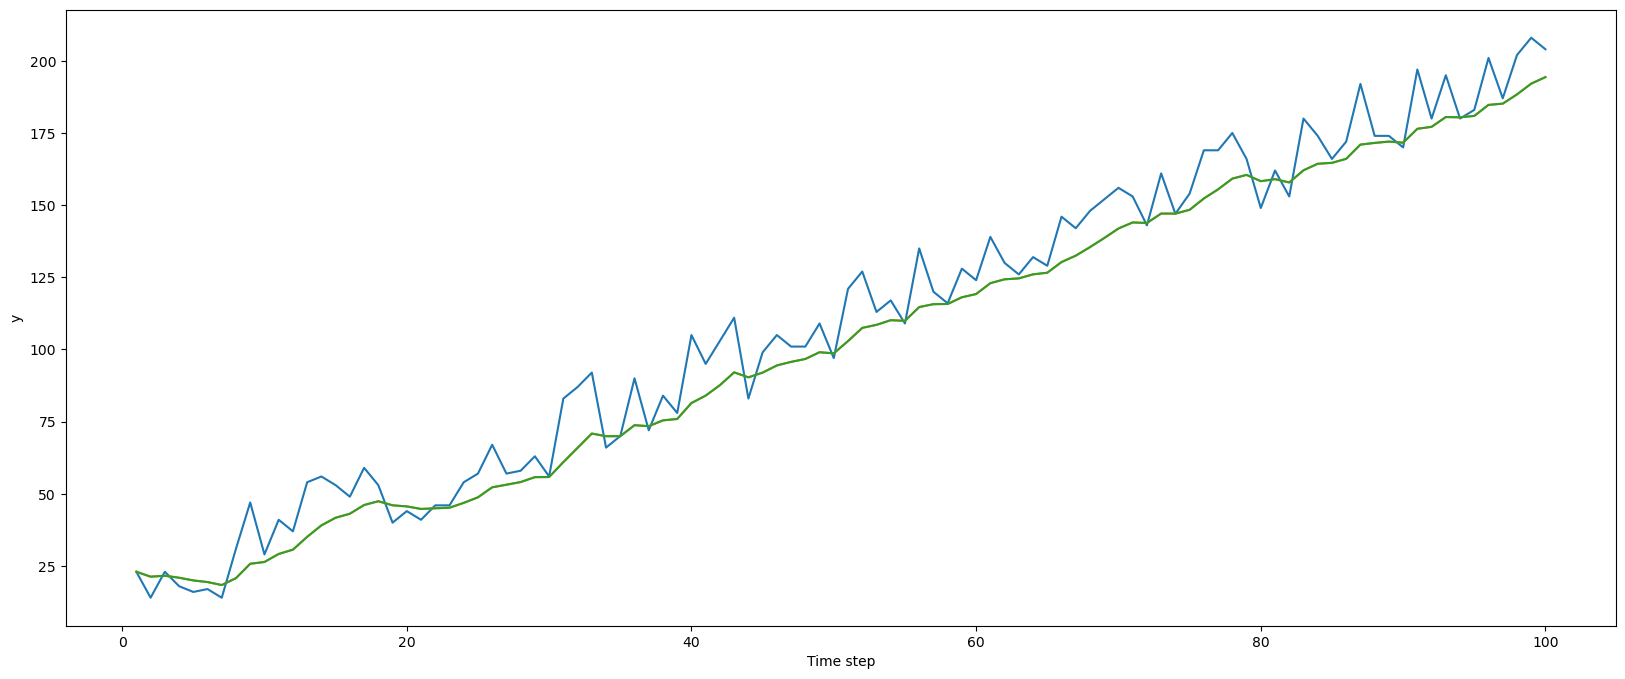

In [17]:
plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Сравним результаты

In [18]:
(data_series['y_exp_norm'] == data_series['y_exp_norm_user']).unique()

array([ True, False])

Рассмотрим отдельно значения временного ряда и соответсвующие им временные метки. Преобразуем тип данных в массив <code>numpy</code>:

In [19]:
import numpy as np
X = data_series.index.to_numpy()
y = data_series['y'].to_numpy()
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Найдем уравнение линейного тренда, используя функцию <code>polyfit</code>

In [21]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 1.87953195 14.52363636]


In [22]:
a = round(poly[0], 2)
b = round(poly[1], 2)

In [29]:
a

1.88

Найдем значения ряда, используя уравнение тренда

In [23]:
x = np.arange(1, 101)
data_series['lin_trend'] = a * x + b

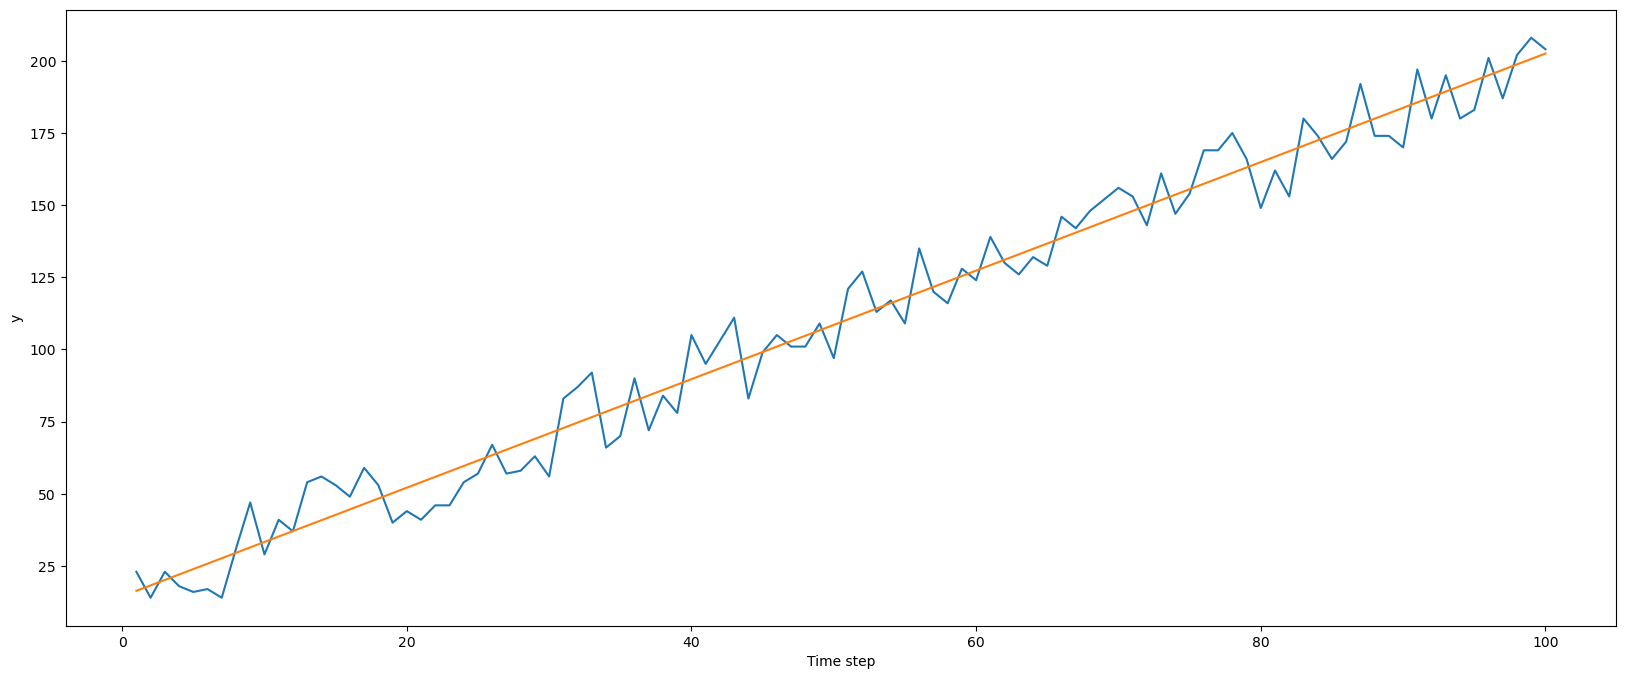

In [24]:
plt.figure(figsize=(20, 8))
plt.plot('y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычислим коэффициент детерминации

$R^{2}=1-\frac{\sum\limits_{i=1}^{n}\left(y_{i}-f_{i}\right)^{2}}{\sum\limits_{i=1}^{n}\left(y_{i}-y_{\mathrm{avg}}\right)^{2}}$

In [25]:
f_i = data_series['lin_trend']
y_avg = data_series['y'].mean()

In [26]:
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [27]:
round(R2, 3)

0.973

Спрогнозируем $101$-ый член ряда

In [28]:
y_101 = a * 101 + b
round(y_101, 0)

204.0